Code explanation: 
# Plot Autocorrelation Function (ACF) to identify significant lags
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
plot_acf(df['traffic_volume'], lags=50, alpha=0.05)  # Plot ACF for 'traffic_volume' with specified lags and significance level
plt.title('Autocorrelation Function (ACF) of Traffic Volume')  # Set title for the plot
plt.xlabel('Lags')  # Label x-axis as 'Lags'
plt.ylabel('ACF')  # Label y-axis as 'ACF'
plt.show()  # Display the ACF plot

# Plot Partial Autocorrelation Function (PACF) to identify significant lags
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
plot_pacf(df['traffic_volume'], lags=50, alpha=0.05)  # Plot PACF for 'traffic_volume' with specified lags and significance level
plt.title('Partial Autocorrelation Function (PACF) of Traffic Volume')  # Set title for the plot
plt.xlabel('Lags')  # Label x-axis as 'Lags'
plt.ylabel('PACF')  # Label y-axis as 'PACF'
plt.show()  # Display the PACF plot

# Calculate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
lags = 50  # Number of lags to compute ACF and PACF
acf_vals = acf(df['traffic_volume'], nlags=lags)  # Compute ACF values
pacf_vals = pacf(df['traffic_volume'], nlags=lags)  # Compute PACF values

# Find significant lags using a threshold (e.g., 0.2)
significant_acf_lags = np.where(np.abs(acf_vals) > 0.2)[0]  # Identify significant ACF lags
significant_pacf_lags = np.where(np.abs(pacf_vals) > 0.2)[0]  # Identify significant PACF lags

# Print the indices of significant ACF and PACF lags
print("Significant ACF Lags:", significant_acf_lags)
print("Significant PACF Lags:", significant_pacf_lags)


<Figure size 1200x600 with 0 Axes>

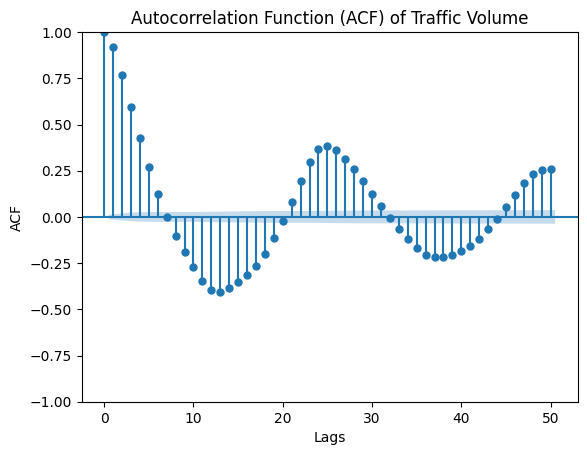

<Figure size 1200x600 with 0 Axes>

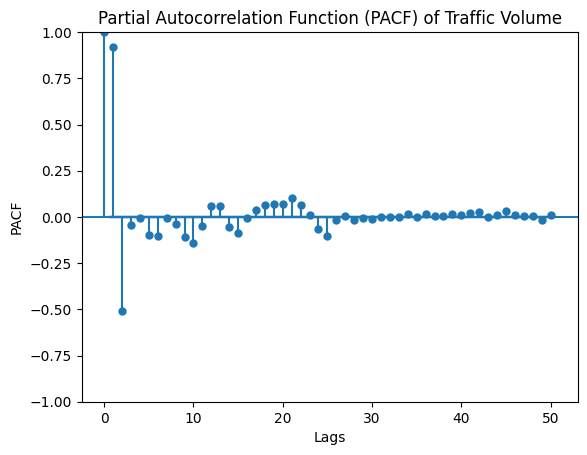

Significant ACF Lags: [ 0  1  2  3  4  5 10 11 12 13 14 15 16 17 23 24 25 26 27 28 36 37 38 39
 48 49 50]
Significant PACF Lags: [0 1 2]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)


# Plot ACF and PACF to identify significant lags
plt.figure(figsize=(12, 6))
plot_acf(df['traffic_volume'], lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Traffic Volume')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['traffic_volume'], lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) of Traffic Volume')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

# Calculate ACF and PACF
lags = 50
acf_vals = acf(df['traffic_volume'], nlags=lags)
pacf_vals = pacf(df['traffic_volume'], nlags=lags)

# Find significant lags using a threshold (e.g., 0.2)
significant_acf_lags = np.where(np.abs(acf_vals) > 0.2)[0]
significant_pacf_lags = np.where(np.abs(pacf_vals) > 0.2)[0]

print("Significant ACF Lags:", significant_acf_lags)
print("Significant PACF Lags:", significant_pacf_lags)


Comments included in code below

C:\Users\kutta\AppData\Local\Temp\ipykernel_2560\3250824883.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])


<Figure size 1200x600 with 0 Axes>

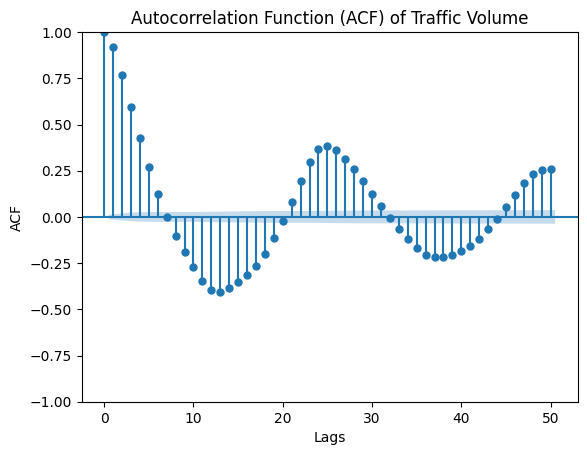

<Figure size 1200x600 with 0 Axes>

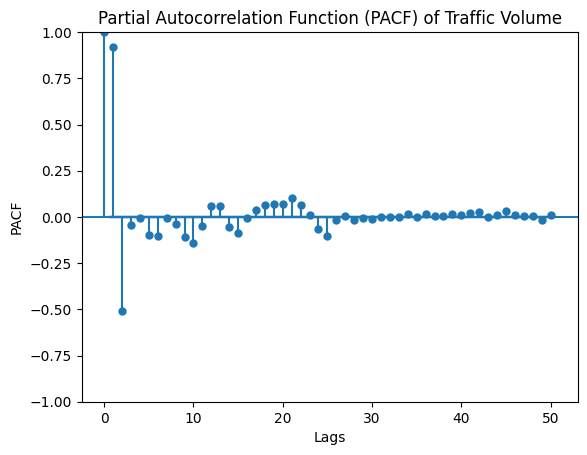

C:\Users\kutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

RMSE: 2059.76362329626
MSE: 4242626.183854537
MAE: 1688.8955947132547
AIC: 393988.78304571006


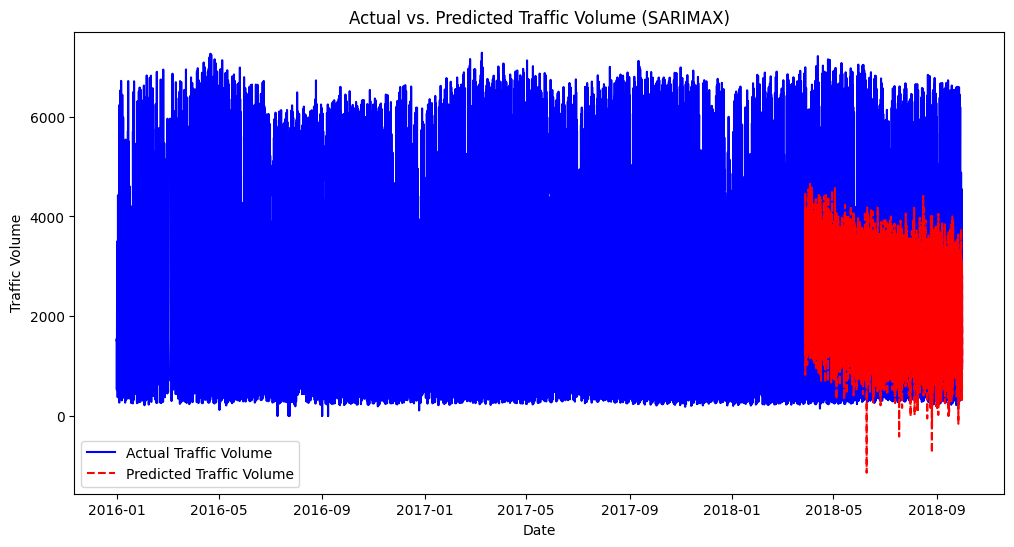


Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                       traffic_volume   No. Observations:                21967
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 24)   Log Likelihood             -196924.392
Date:                              Sat, 13 Apr 2024   AIC                         393988.783
Time:                                      21:35:30   BIC                         394548.594
Sample:                                           0   HQIC                        394171.107
                                            - 21967                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           623.7979     12.329     50.595      0.000     599.633     647.963
x2 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Date, Time, and AM/PM columns to datetime format
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])

# Extract useful datetime features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek

# Define features (X) and target (y) for SARIMAX model
X = df[['hour', 'day_of_week', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'holiday', 'weather_main', 'weather_description']]#used all variables. categorical and numerical
y = df['traffic_volume']

# One-hot encode categorical variables in features (X)
X_encoded = pd.get_dummies(X, columns=['holiday', 'weather_main', 'weather_description'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot ACF and PACF to identify significant lags
plt.figure(figsize=(12, 6))
plot_acf(df['traffic_volume'], lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Traffic Volume')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['traffic_volume'], lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) of Traffic Volume')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

# Choose SARIMAX model parameters based on significant lags
order = (2, 0, 2)  # (p, d, q) based on significant PACF lags 
seasonal_order = (1, 0, 1, 24)  # (P, D, Q, S) based on seasonality (daily data) (took 24hr window because traffic is based on hourly data)

# Build and train the SARIMAX model
sarimax_model = SARIMAX(endog=y_train, exog=X_train_scaled, order=order, seasonal_order=seasonal_order)
sarimax_result = sarimax_model.fit()

# Make predictions
sarimax_predictions = sarimax_result.get_forecast(steps=len(X_test_scaled), exog=X_test_scaled)
sarimax_predictions_mean = sarimax_predictions.predicted_mean

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, sarimax_predictions_mean))
mse = mean_squared_error(y_test, sarimax_predictions_mean)
mae = mean_absolute_error(y_test, sarimax_predictions_mean)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)

# Print AIC value
print("AIC:", sarimax_result.aic)

# Plot actual vs. predicted traffic volume based on datetime
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['traffic_volume'], label='Actual Traffic Volume', color='blue')
plt.plot(df['datetime'][-len(sarimax_predictions_mean):], sarimax_predictions_mean, label='Predicted Traffic Volume', color='red', linestyle='--')
plt.title('Actual vs. Predicted Traffic Volume (SARIMAX)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

# Print model summary and insights
print("\nModel Summary:")
print(sarimax_result.summary())

# Extract and interpret coefficient values
coefficients = sarimax_result.params
attribute_names = X_encoded.columns.tolist()

# Create DataFrame with attribute names and coefficients
if len(attribute_names) == len(coefficients):
    coefficients_df = pd.DataFrame({'Attribute': attribute_names, 'Coefficient': coefficients.values})
    print("\nCoefficient Values:")
    print(coefficients_df)
else:
    print("Error: Lengths of attribute_names and coefficients do not match.")


C:\Users\kutta\AppData\Local\Temp\ipykernel_10972\3501994932.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])


<Figure size 1200x600 with 0 Axes>

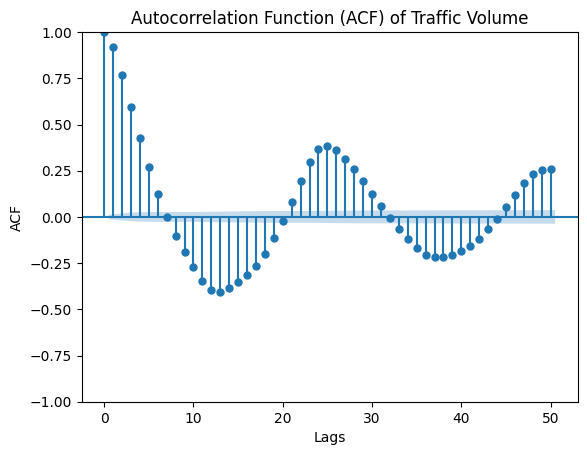

<Figure size 1200x600 with 0 Axes>

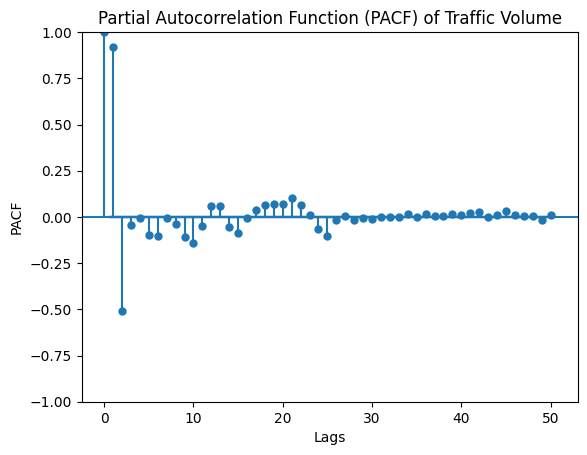

C:\Users\kutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

RMSE: 2059.76362329626
MSE: 4242626.183854537
MAE: 1688.8955947132547
AIC: 393988.78304571006


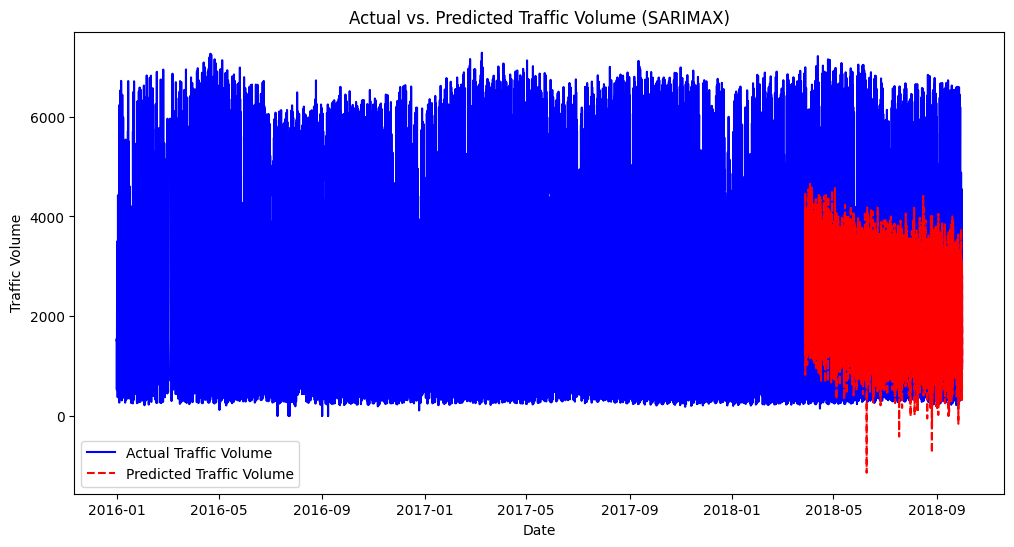


Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                       traffic_volume   No. Observations:                21967
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 24)   Log Likelihood             -196924.392
Date:                              Mon, 15 Apr 2024   AIC                         393988.783
Time:                                      18:28:18   BIC                         394548.594
Sample:                                           0   HQIC                        394171.107
                                            - 21967                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           623.7979     12.329     50.595      0.000     599.633     647.963
x2 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Date, Time, and AM/PM columns to datetime format
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])

# Extract useful datetime features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek

# Define features (X) and target (y) for SARIMAX model
X = df[['hour', 'day_of_week', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'holiday', 'weather_main', 'weather_description']]
y = df['traffic_volume']

# One-hot encode categorical variables in features (X)
X_encoded = pd.get_dummies(X, columns=['holiday', 'weather_main', 'weather_description'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot ACF and PACF to identify significant lags
plt.figure(figsize=(12, 6))
plot_acf(df['traffic_volume'], lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Traffic Volume')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['traffic_volume'], lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) of Traffic Volume')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

# Choose SARIMAX model parameters based on significant lags
order = (2, 0, 2)  # (p, d, q) based on significant PACF lags
seasonal_order = (1, 0, 1, 24)  # (P, D, Q, S) based on seasonality (daily data)

# Build and train the SARIMAX model
sarimax_model = SARIMAX(endog=y_train, exog=X_train_scaled, order=order, seasonal_order=seasonal_order)
sarimax_result = sarimax_model.fit()

# Make predictions
sarimax_predictions = sarimax_result.get_forecast(steps=len(X_test_scaled), exog=X_test_scaled)
sarimax_predictions_mean = sarimax_predictions.predicted_mean

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, sarimax_predictions_mean))
mse = mean_squared_error(y_test, sarimax_predictions_mean)
mae = mean_absolute_error(y_test, sarimax_predictions_mean)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)

# Print AIC value
print("AIC:", sarimax_result.aic)

# Plot actual vs. predicted traffic volume based on datetime
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['traffic_volume'], label='Actual Traffic Volume', color='blue')
plt.plot(df['datetime'][-len(sarimax_predictions_mean):], sarimax_predictions_mean, label='Predicted Traffic Volume', color='red', linestyle='--')
plt.title('Actual vs. Predicted Traffic Volume (SARIMAX)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

# Print model summary and insights
print("\nModel Summary:")
print(sarimax_result.summary())

# Extract and interpret coefficient values
# Get the names of the exogenous variables (predictors)
exog_names = sarimax_result.model.exog_names

# Get the coefficients of the exogenous variables (excluding intercept)
coefficients = sarimax_result.params[1:len(exog_names)+1]

# Create a dictionary mapping predictor names to coefficients
predictor_coefficients = dict(zip(exog_names, coefficients))

# Print the predictor names and their corresponding coefficients
for predictor, coefficient in predictor_coefficients.items():
    print(f"{predictor}: Coefficient = {coefficient}")

# Identify the predictors with the highest and lowest coefficients
highest_predictor = max(predictor_coefficients, key=predictor_coefficients.get)
lowest_predictor = min(predictor_coefficients, key=predictor_coefficients.get)

print(f"\nHighest Predictor of Traffic Volume: {highest_predictor} (Coefficient: {predictor_coefficients[highest_predictor]})")
print(f"Lowest Predictor of Traffic Volume: {lowest_predictor} (Coefficient: {predictor_coefficients[lowest_predictor]})")


EDA

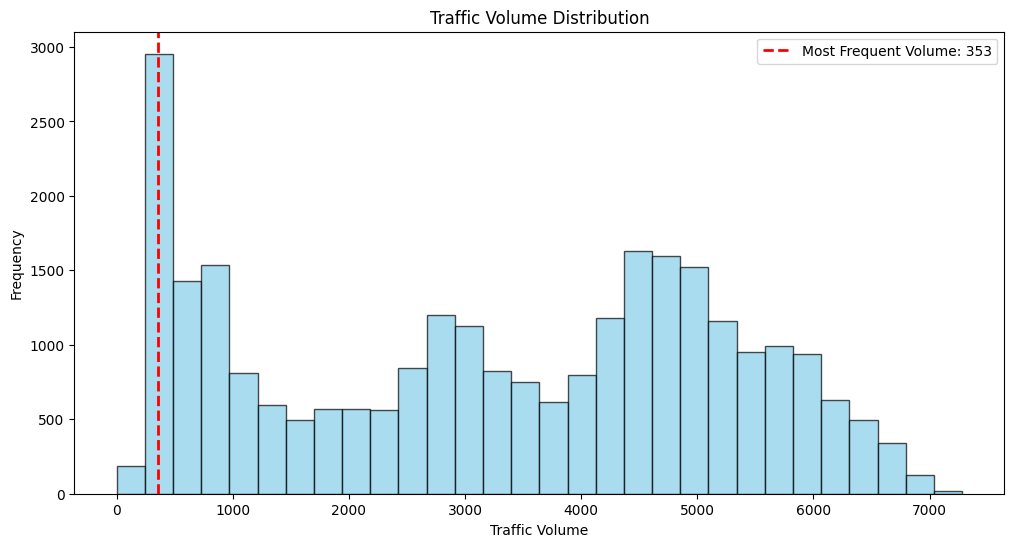

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Identify the most frequent traffic volume value
most_frequent_volume = df['traffic_volume'].mode().iloc[0]

# Plot traffic volume distribution as a histogram
plt.figure(figsize=(12, 6))
plt.hist(df['traffic_volume'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')

# Add a red dotted line at the most frequent traffic volume
plt.axvline(most_frequent_volume, color='red', linestyle='dashed', linewidth=2, label=f'Most Frequent Volume: {most_frequent_volume}')
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'Date', 'Time', 'AM/PM', 'traffic_volume',
       'Group'],
      dtype='object')


C:\Users\kutta\AppData\Local\Temp\ipykernel_19644\2218157653.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])


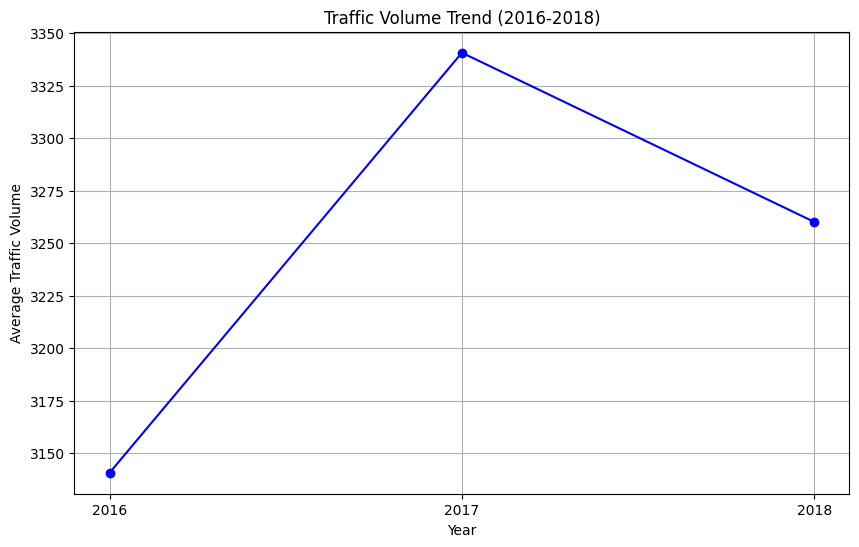

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Display the columns in the DataFrame to verify column names
print(df.columns)

# Assuming the columns are named 'Date', 'Time', 'AM/PM', and 'traffic_volume' based on the previous context
# Combine Date, Time, and AM/PM into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])

# Extract year from 'Datetime' column
df['Year'] = df['Datetime'].dt.year

# Filter data for years 2016 to 2018
df_2016_to_2018 = df[df['Year'].between(2016, 2018)]

# Aggregate traffic volume by year
traffic_volume_by_year = df_2016_to_2018.groupby('Year')['traffic_volume'].mean()

# Plot the traffic volume trend by year (line graph)
plt.figure(figsize=(10, 6))
plt.plot(traffic_volume_by_year.index, traffic_volume_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Traffic Volume Trend (2016-2018)')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')
plt.xticks(traffic_volume_by_year.index)  # Show all years on x-axis
plt.grid(True)
plt.show()


In [22]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Count the occurrences of each traffic volume value and sort by frequency (descending)
traffic_volume_counts = df['traffic_volume'].value_counts().sort_values(ascending=False)

# Print traffic volume values based on frequency (highest to lowest)
print("Traffic Volume Values by Frequency (Highest to Lowest):")
for volume, count in traffic_volume_counts.items():
    print(f"Traffic Volume: {volume}, Occurrences: {count}")


Traffic Volume Values by Frequency (Highest to Lowest):
Traffic Volume: 353, Occurrences: 32
Traffic Volume: 337, Occurrences: 30
Traffic Volume: 356, Occurrences: 30
Traffic Volume: 351, Occurrences: 29
Traffic Volume: 358, Occurrences: 28
Traffic Volume: 344, Occurrences: 27
Traffic Volume: 340, Occurrences: 26
Traffic Volume: 349, Occurrences: 26
Traffic Volume: 357, Occurrences: 24
Traffic Volume: 333, Occurrences: 24
Traffic Volume: 373, Occurrences: 24
Traffic Volume: 348, Occurrences: 24
Traffic Volume: 352, Occurrences: 23
Traffic Volume: 360, Occurrences: 23
Traffic Volume: 365, Occurrences: 23
Traffic Volume: 327, Occurrences: 23
Traffic Volume: 313, Occurrences: 22
Traffic Volume: 369, Occurrences: 22
Traffic Volume: 354, Occurrences: 22
Traffic Volume: 300, Occurrences: 22
Traffic Volume: 310, Occurrences: 21
Traffic Volume: 382, Occurrences: 21
Traffic Volume: 315, Occurrences: 21
Traffic Volume: 325, Occurrences: 21
Traffic Volume: 329, Occurrences: 21
Traffic Volume: 367

In [30]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Group by the combination of attributes and calculate frequency of each combination
grouped = df.groupby(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']).size().reset_index(name='frequency')

# Find the combination(s) with the highest frequency of traffic volume occurrence
max_frequency_combination = grouped[grouped['frequency'] == grouped['frequency'].max()]

# Display the combination(s) with the highest frequency of traffic volume occurrence
print("Combination(s) with the highest frequency of traffic volume occurrence:")
print(max_frequency_combination)


Combination(s) with the highest frequency of traffic volume occurrence:
          holiday     temp  rain_1h  snow_1h  clouds_all weather_main  \
17241  No Holiday  297.888      0.0      0.0           0        Clear   

      weather_description  frequency  
17241        Sky is Clear         43  


In [42]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Filter traffic volume values up to a specified threshold (e.g., up to 10)
threshold_value = 10
filtered_traffic_volume = df[df['traffic_volume'] <= threshold_value]

# Count occurrences of each traffic volume value within the filtered range
volume_counts = filtered_traffic_volume['traffic_volume'].value_counts().sort_index()

# Display traffic volume values and their corresponding occurrence counts up to the specified threshold
print(f"Traffic volume values and occurrence counts up to {threshold_value}:")
for volume_value, count in volume_counts.items():
    print(f"Traffic Volume: {volume_value}, Occurrences: {count}")


Traffic volume values and occurrence counts up to 10:
Traffic Volume: 0, Occurrences: 2
Traffic Volume: 1, Occurrences: 5
Traffic Volume: 2, Occurrences: 7
Traffic Volume: 3, Occurrences: 9
Traffic Volume: 5, Occurrences: 6
Traffic Volume: 6, Occurrences: 2
Traffic Volume: 7, Occurrences: 6
Traffic Volume: 8, Occurrences: 2
Traffic Volume: 9, Occurrences: 1
Traffic Volume: 10, Occurrences: 6


In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include rows where traffic_volume is 0
filtered_df = df[df['traffic_volume'] == 0]

# Group by the combination of attributes and calculate frequency of each combination
grouped = filtered_df.groupby(['holiday','rain_1h', 'snow_1h']).size().reset_index(name='frequency')

# Find the combination(s) with the highest frequency of traffic volume 0 occurrences 
max_frequency = grouped['frequency'].max()
max_frequency_combinations = grouped[grouped['frequency'] == max_frequency]

# Display the combination(s) with the highest frequency of traffic volume 0
print(f"Combination(s) with the highest frequency of traffic volume 0 occurrences ({max_frequency} times):")
print(max_frequency_combinations)


Combination(s) with the highest frequency of traffic volume 0 occurrences (2 times):
      holiday  rain_1h  snow_1h  frequency
0  No Holiday      0.0      0.0          2


In [21]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include rows where traffic_volume is 0
filtered_df = df[df['traffic_volume'] == 0]

# Group by the combination of attributes and calculate frequency of each combination
grouped = filtered_df.groupby(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']).size().reset_index(name='frequency')

# Find the combination(s) with the highest frequency of traffic volume 0 occurrences 
max_frequency = grouped['frequency'].max()
max_frequency_combinations = grouped[grouped['frequency'] == max_frequency]

# Display the combination(s) with the highest frequency of traffic volume 0
print(f"Combination(s) with the highest frequency of traffic volume 0 occurrences ({max_frequency} times):")
print(max_frequency_combinations)


Combination(s) with the highest frequency of traffic volume 0 occurrences (1 times):
      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0  No Holiday  295.90      0.0      0.0          90         Haze   
1  No Holiday  296.68      0.0      0.0          40         Rain   

  weather_description  frequency  
0                haze          1  
1          light rain          1  


In [65]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include rows where traffic_volume is 3
filtered_df = df[df['traffic_volume'] == 3]

# Group by the combination of attributes and calculate frequency of each combination
grouped = filtered_df.groupby(['holiday','temp','rain_1h', 'snow_1h', 'clouds_all']).size().reset_index(name='frequency')

# Find the combination(s) with the highest frequency of traffic volume 3 occurrences (9 times)
max_frequency = grouped['frequency'].max()
max_frequency_combinations = grouped[grouped['frequency'] == max_frequency]

# Display the combination(s) with the highest frequency of traffic volume 3 occurrences (9 times)
print(f"Combination(s) with the highest frequency of traffic volume 3 occurrences ({max_frequency} times):")
print(max_frequency_combinations)


Combination(s) with the highest frequency of traffic volume 3 occurrences (3 times):
      holiday    temp  rain_1h  snow_1h  clouds_all  frequency
3  No Holiday  296.58     1.02      0.0          90          3


In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include rows where traffic_volume is 3
filtered_df = df[df['traffic_volume'] == 3]

# Group by the combination of attributes and calculate frequency of each combination
grouped = filtered_df.groupby(['holiday','temp','rain_1h', 'snow_1h', 'clouds_all']).size().reset_index(name='frequency')

# Find the combination(s) with the highest frequency of traffic volume 3 occurrences (9 times)
max_frequency = grouped['frequency'].max()
max_frequency_combinations = grouped[grouped['frequency'] == max_frequency]

# Display the combination(s) with the highest frequency of traffic volume 3 occurrences (9 times)
print(f"Combination(s) with the highest frequency of traffic volume 3 occurrences ({max_frequency} times):")
print(max_frequency_combinations)


Combination(s) with the highest frequency of traffic volume 3 occurrences (3 times):
      holiday    temp  rain_1h  snow_1h  clouds_all  frequency
3  No Holiday  296.58     1.02      0.0          90          3


In [55]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include rows where traffic_volume is 353
filtered_df = df[df['traffic_volume'] == 353]

# Group by the combination of attributes and calculate frequency of each combination
grouped = filtered_df.groupby(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']).size().reset_index(name='frequency')

# Find the combination(s) with the highest frequency of traffic volume 353 occurrences 
max_frequency = grouped['frequency'].max()
max_frequency_combinations = grouped[grouped['frequency'] == max_frequency]

# Display the combination(s) with the highest frequency of traffic volume 3 occurrences 
print(f"Combination(s) with the highest frequency of traffic volume 353 occurrences ({max_frequency} times):")
print(max_frequency_combinations)


Combination(s) with the highest frequency of traffic volume 353 occurrences (11 times):
      holiday  rain_1h  snow_1h  clouds_all weather_main weather_description  \
0  No Holiday      0.0      0.0           1        Clear        sky is clear   

   frequency  
0         11  


In [68]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Define the list of attributes to analyze
attributes = ['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']

# Function to find the attribute value with the highest traffic volume frequency for each attribute
def find_highest_traffic_volume_value(attribute):
    # Group by the attribute and calculate the sum of traffic volume occurrences
    grouped = df.groupby(attribute)['traffic_volume'].sum().reset_index(name='total_traffic_volume')
    # Find the attribute value(s) with the highest total traffic volume
    max_traffic_volume = grouped['total_traffic_volume'].max()
    highest_traffic_volume_values = grouped[grouped['total_traffic_volume'] == max_traffic_volume]
    return highest_traffic_volume_values

# Iterate over each attribute and find the attribute value with the highest traffic volume
for attribute in attributes:
    highest_traffic_volume_values = find_highest_traffic_volume_value([attribute])
    print(f"Attribute value(s) with the highest traffic volume for {attribute}:")
    print(highest_traffic_volume_values)
    print()


Attribute value(s) with the highest traffic volume for holiday:
      holiday  total_traffic_volume
7  No Holiday              89278530

Attribute value(s) with the highest traffic volume for temp:
        temp  total_traffic_volume
1612  274.15                346321

Attribute value(s) with the highest traffic volume for rain_1h:
   rain_1h  total_traffic_volume
0      0.0              85139368

Attribute value(s) with the highest traffic volume for snow_1h:
   snow_1h  total_traffic_volume
0      0.0              89243935

Attribute value(s) with the highest traffic volume for clouds_all:
    clouds_all  total_traffic_volume
19          90              31824588

Attribute value(s) with the highest traffic volume for weather_main:
  weather_main  total_traffic_volume
1       Clouds              28700244

Attribute value(s) with the highest traffic volume for weather_description:
   weather_description  total_traffic_volume
26        sky is clear              20461418



C:\Users\kutta\AppData\Local\Temp\ipykernel_18400\2746511159.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])


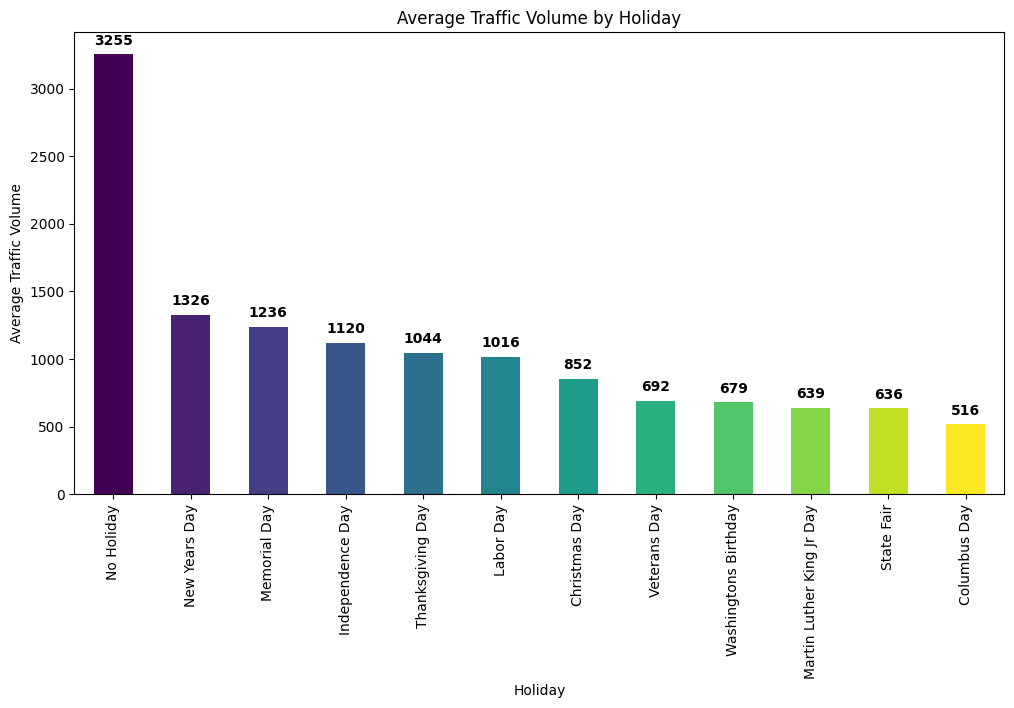

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Combine Date, Time, and AM/PM into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])

# Drop the individual Date, Time, and AM/PM columns
df.drop(['Date', 'Time', 'AM/PM'], axis=1, inplace=True)

# Calculate average traffic volume by holiday and round to nearest whole number
holiday_avg_traffic = df.groupby('holiday')['traffic_volume'].mean().round().sort_values(ascending=False)

# Plot traffic_volume distribution by holiday in descending order of average traffic volume
plt.figure(figsize=(12, 6))

# Define colors based on traffic volume values
colors = plt.cm.viridis(np.linspace(0, 1, len(holiday_avg_traffic)))

# Create bar plot with custom colors
ax = holiday_avg_traffic.plot(kind='bar', color=colors)

plt.title('Average Traffic Volume by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Traffic Volume')

# Add average traffic volume values as text labels on top of each bar
for i, (holiday, avg_traffic) in enumerate(holiday_avg_traffic.items()):
    ax.text(i, avg_traffic + 50, f'{int(avg_traffic)}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()


C:\Users\kutta\AppData\Local\Temp\ipykernel_18400\719471146.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])


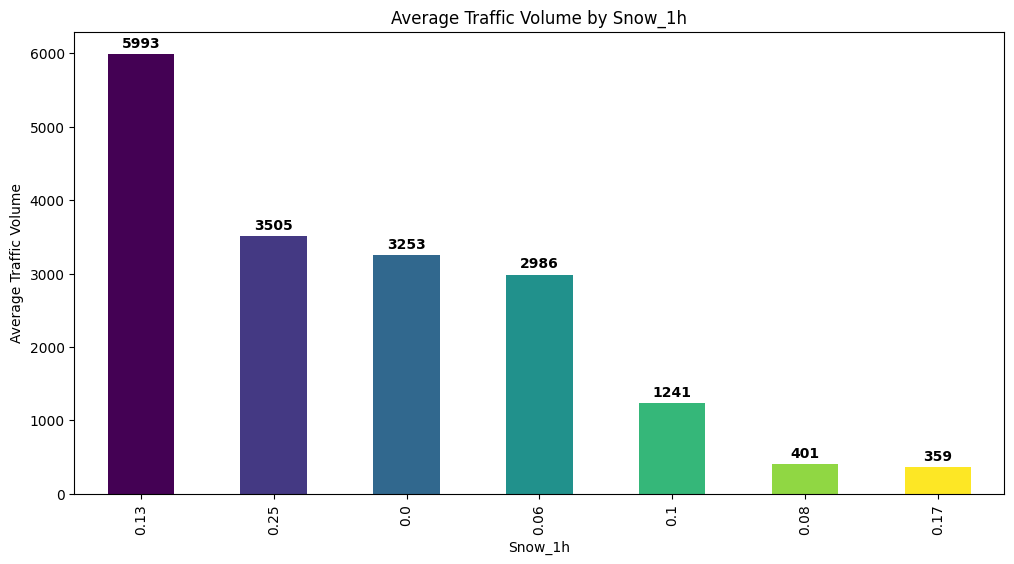

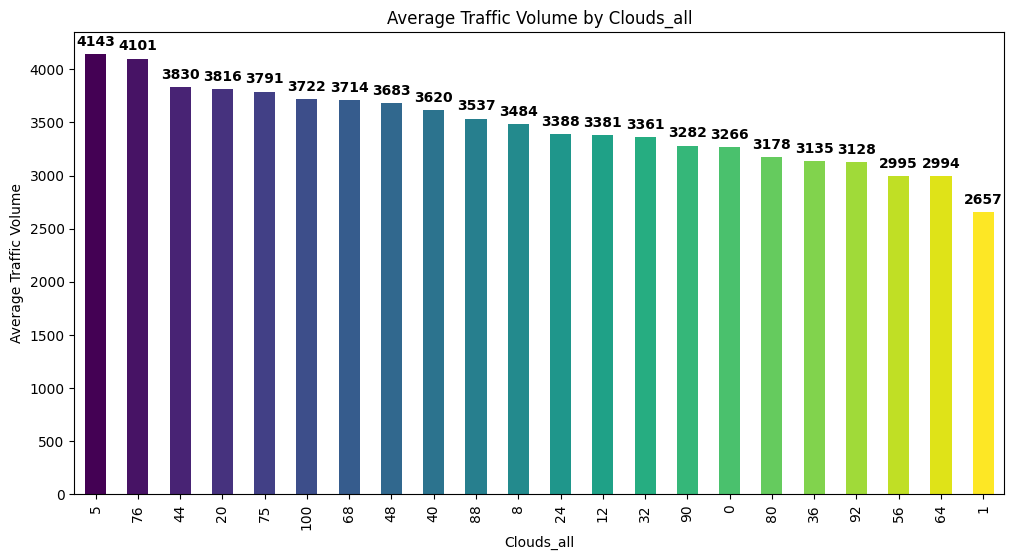

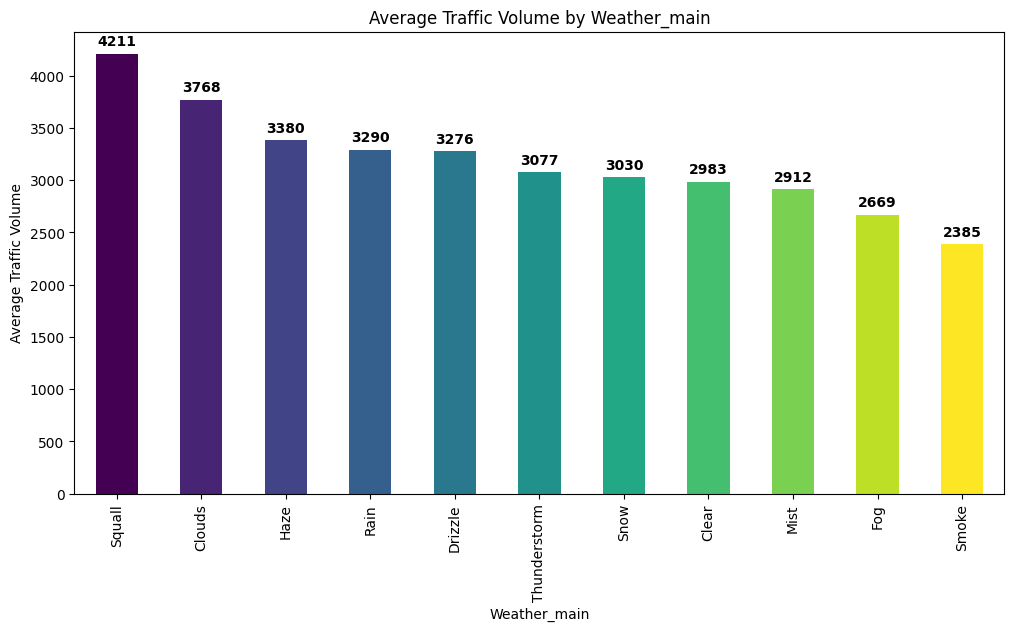

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Combine Date, Time, and AM/PM into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])

# Drop the individual Date, Time, and AM/PM columns
df.drop(['Date', 'Time', 'AM/PM'], axis=1, inplace=True)

# Function to plot average feature values
def plot_average_by_feature(feature_name):
    # Calculate average feature value by category and round to nearest whole number
    avg_feature_values = df.groupby(feature_name)['traffic_volume'].mean().round().sort_values(ascending=False)

    # Plot feature distribution in descending order of average traffic volume
    plt.figure(figsize=(12, 6))

    # Define colors based on feature values
    colors = plt.cm.viridis(np.linspace(0, 1, len(avg_feature_values)))

    # Create bar plot with custom colors
    ax = avg_feature_values.plot(kind='bar', color=colors)

    plt.title(f'Average Traffic Volume by {feature_name.capitalize()}')
    plt.xlabel(feature_name.capitalize())
    plt.ylabel('Average Traffic Volume')

    # Add average traffic volume values as text labels on top of each bar
    for i, (value, avg_traffic) in enumerate(avg_feature_values.items()):
        ax.text(i, avg_traffic + 50, f'{int(avg_traffic)}', ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()



# Plot average traffic volume by snowfall (snow_1h)
plot_average_by_feature('snow_1h')

# Plot average traffic volume by cloudiness (clouds_all)
plot_average_by_feature('clouds_all')

# Plot average traffic volume by weather main category (weather_main)
plot_average_by_feature('weather_main')


C:\Users\kutta\AppData\Local\Temp\ipykernel_12492\3555208672.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])


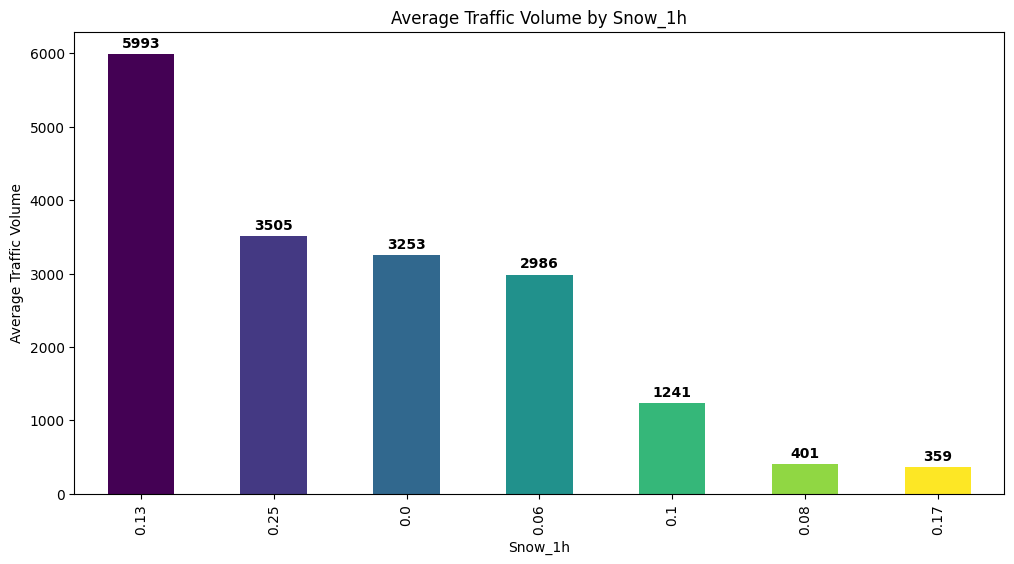

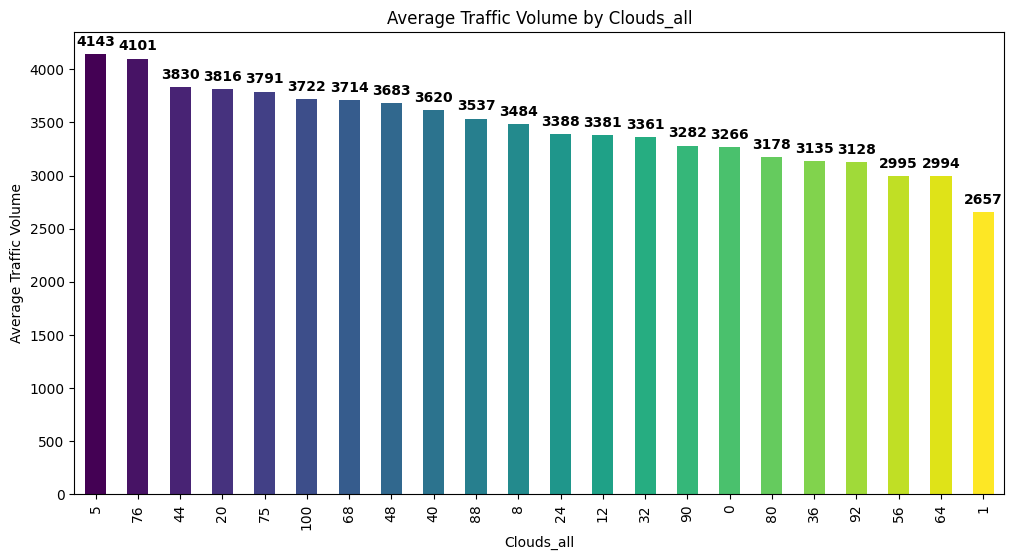

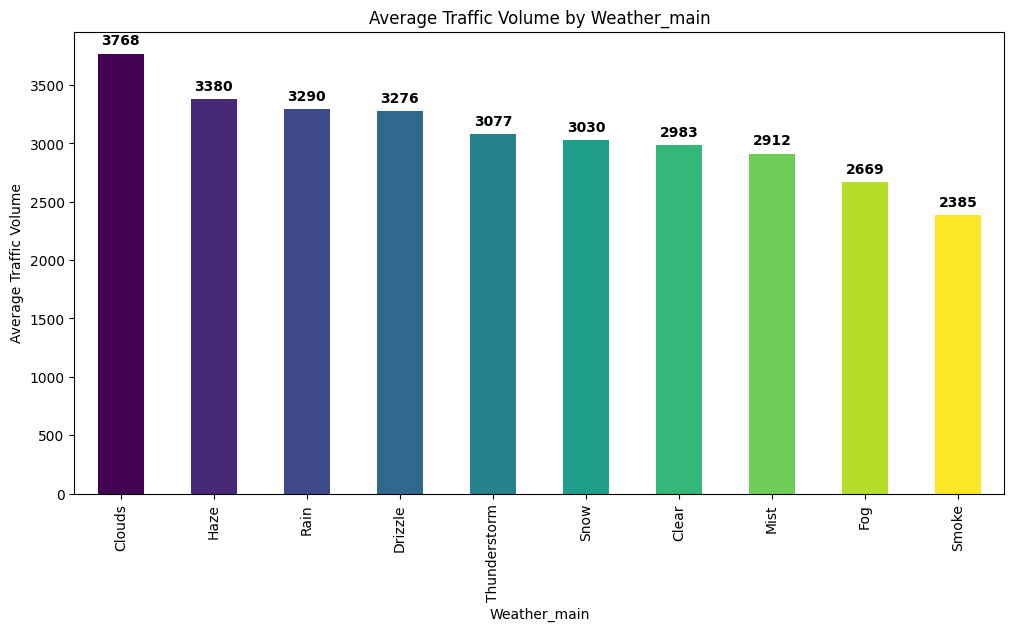

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Combine Date, Time, and AM/PM into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])

# Drop the individual Date, Time, and AM/PM columns
df.drop(['Date', 'Time', 'AM/PM'], axis=1, inplace=True)

# Function to plot average feature values, excluding specified categories
def plot_average_by_feature(feature_name, exclude_categories=None):
    if exclude_categories is None:
        exclude_categories = []
        
    # Filter DataFrame to exclude specified categories
    filtered_df = df[~df['weather_main'].isin(exclude_categories)]

    # Calculate average feature value by category and round to nearest whole number
    avg_feature_values = filtered_df.groupby(feature_name)['traffic_volume'].mean().round().sort_values(ascending=False)

    # Plot feature distribution in descending order of average traffic volume
    plt.figure(figsize=(12, 6))

    # Define colors based on feature values
    colors = plt.cm.viridis(np.linspace(0, 1, len(avg_feature_values)))

    # Create bar plot with custom colors
    ax = avg_feature_values.plot(kind='bar', color=colors)

    plt.title(f'Average Traffic Volume by {feature_name.capitalize()}')
    plt.xlabel(feature_name.capitalize())
    plt.ylabel('Average Traffic Volume')

    # Add average traffic volume values as text labels on top of each bar
    for i, (value, avg_traffic) in enumerate(avg_feature_values.items()):
        ax.text(i, avg_traffic + 50, f'{int(avg_traffic)}', ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

# Define categories to exclude from weather_main
exclude_weather_categories = ['Squall']

# Plot average traffic volume by snowfall (snow_1h)
plot_average_by_feature('snow_1h')

# Plot average traffic volume by cloudiness (clouds_all)
plot_average_by_feature('clouds_all')

# Plot average traffic volume by weather main category (weather_main), excluding 'Squall'
plot_average_by_feature('weather_main', exclude_categories=exclude_weather_categories)


C:\Users\kutta\AppData\Local\Temp\ipykernel_18400\3982792074.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])


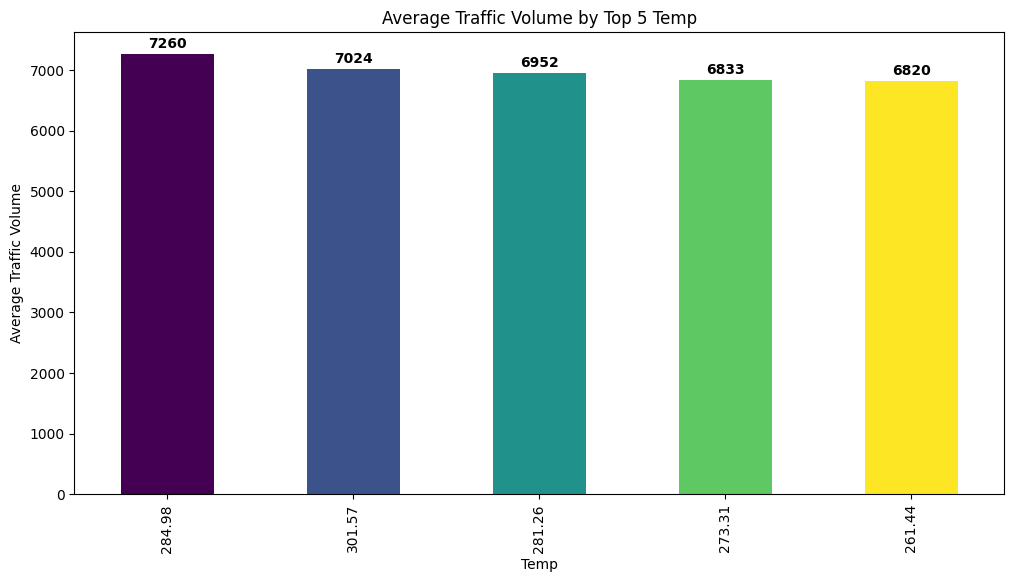

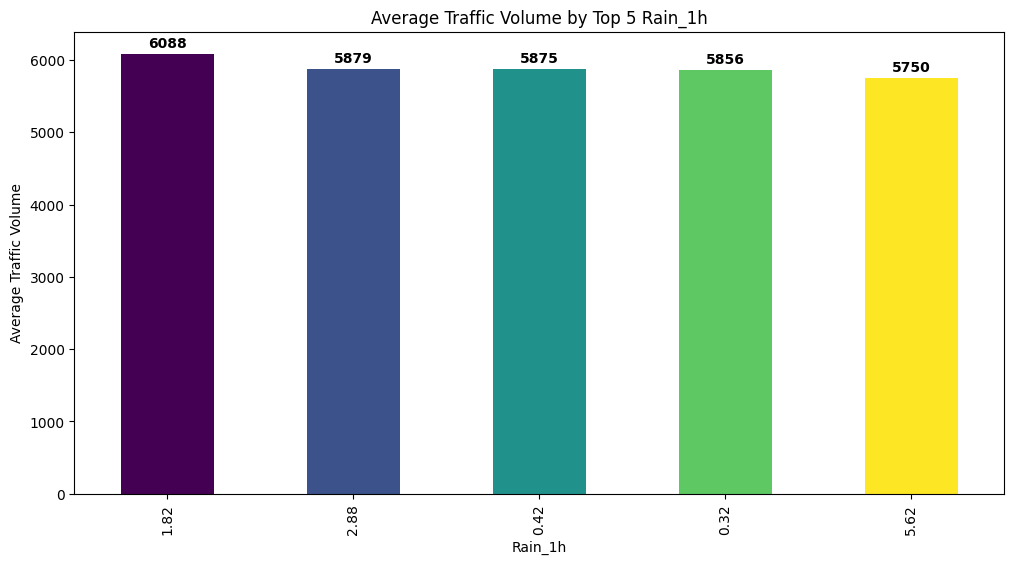

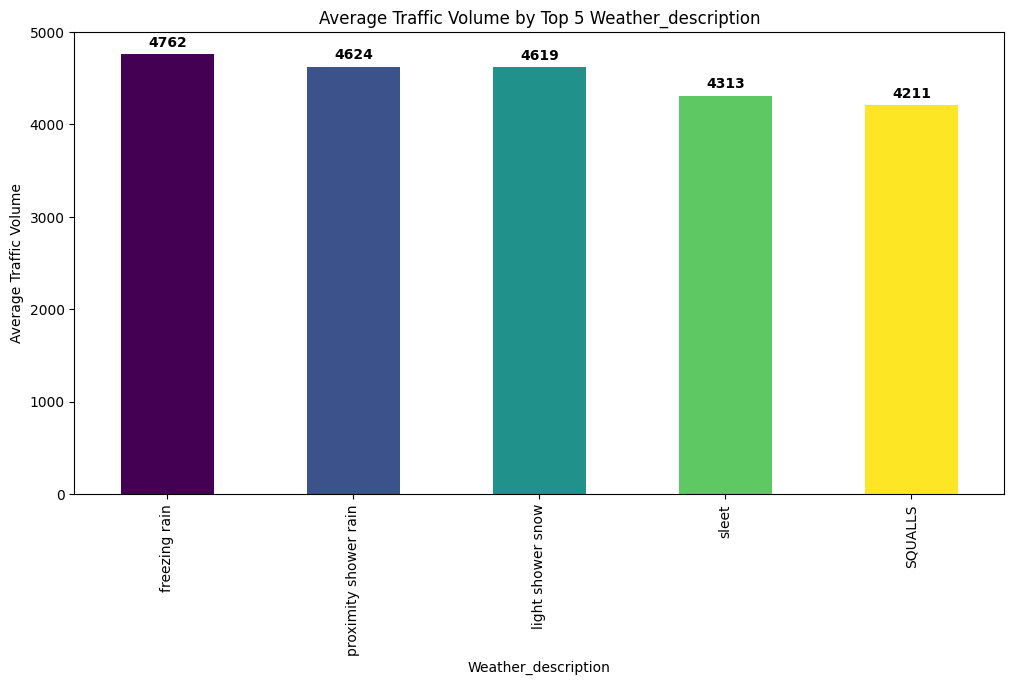

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Combine Date, Time, and AM/PM into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] + ' ' + df['AM/PM'])

# Drop the individual Date, Time, and AM/PM columns
df.drop(['Date', 'Time', 'AM/PM'], axis=1, inplace=True)

# Function to plot average feature values for top N categories
def plot_average_by_feature_top_n(feature_name, n=5):
    # Calculate average feature value by category and round to nearest whole number
    avg_feature_values = df.groupby(feature_name)['traffic_volume'].mean().round().sort_values(ascending=False)

    # Select top N categories by average traffic volume
    top_n_values = avg_feature_values.head(n)

    # Plot feature distribution for top N categories in descending order of average traffic volume
    plt.figure(figsize=(12, 6))

    # Define colors based on feature values
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_n_values)))

    # Create bar plot with custom colors
    ax = top_n_values.plot(kind='bar', color=colors)

    plt.title(f'Average Traffic Volume by Top {n} {feature_name.capitalize()}')
    plt.xlabel(feature_name.capitalize())
    plt.ylabel('Average Traffic Volume')

    # Add average traffic volume values as text labels on top of each bar
    for i, (value, avg_traffic) in enumerate(top_n_values.items()):
        ax.text(i, avg_traffic + 50, f'{int(avg_traffic)}', ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

# Plot average traffic volume by top 5 temperature (temp) values
plot_average_by_feature_top_n('temp', n=5)

# Plot average traffic volume by top 5 rainfall (rain_1h) values
plot_average_by_feature_top_n('rain_1h', n=5)

# Plot average traffic volume by top 5 weather descriptions (weather_description) values
plot_average_by_feature_top_n('weather_description', n=5)


C:\Users\kutta\AppData\Local\Temp\ipykernel_20424\122210428.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM/PM'])


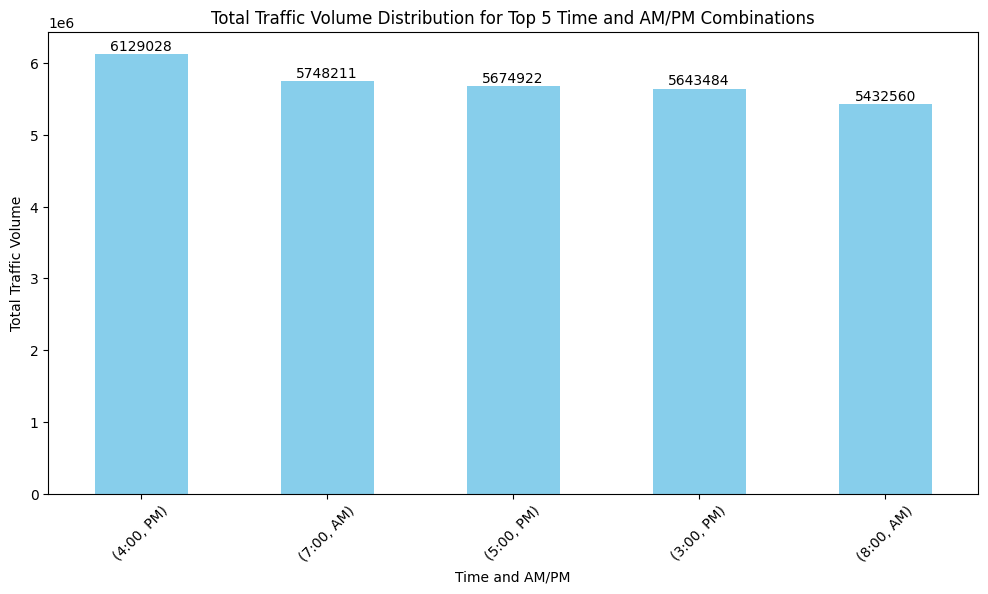

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Combine Time and AM/PM into a single datetime column
df['Datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM/PM'])

# Calculate total traffic volume for each Time and AM/PM combination
time_ampm_traffic = df.groupby(['Time', 'AM/PM'])['traffic_volume'].sum().sort_values(ascending=False)

# Select the top 5 Time and AM/PM combinations with the highest total traffic volume
top_time_ampm_traffic = time_ampm_traffic.head(5)

# Plot traffic volume distribution for the top 5 Time and AM/PM combinations
plt.figure(figsize=(12, 6))
top_time_ampm_traffic.plot(kind='bar', color='skyblue')

# Add total traffic volume as text labels on top of each bar
for i, volume in enumerate(top_time_ampm_traffic):
    plt.text(i, volume + 10000, f'{int(volume)}', ha='center', va='bottom')

plt.title('Total Traffic Volume Distribution for Top 5 Time and AM/PM Combinations')
plt.xlabel('Time and AM/PM')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.show()


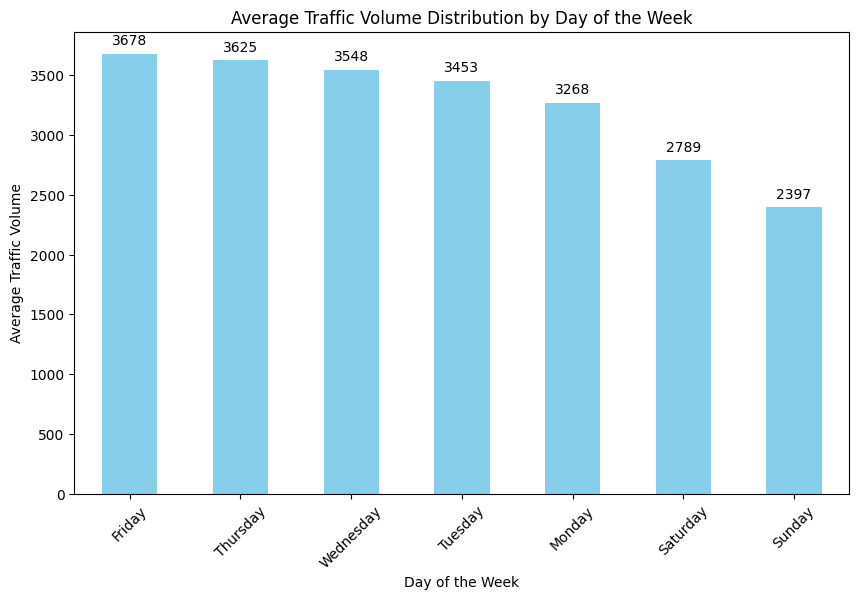

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format and extract the day of the week (0=Monday, 6=Sunday)
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Calculate average traffic volume for each day of the week
day_of_week_avg_traffic = df.groupby('Day_of_Week')['traffic_volume'].mean()

# Sort average traffic volume by day of the week in descending order
day_of_week_avg_traffic_sorted = day_of_week_avg_traffic.sort_values(ascending=False)

# Plot traffic volume distribution by day of the week (descending order of average traffic volume)
plt.figure(figsize=(10, 6))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_avg_traffic_sorted.index = [day_names[idx] for idx in day_of_week_avg_traffic_sorted.index]  # Set sorted day names as index
day_of_week_avg_traffic_sorted.plot(kind='bar', color='skyblue')

# Add average traffic volume as text labels on top of each bar
for i, avg_volume in enumerate(day_of_week_avg_traffic_sorted):
    plt.text(i, avg_volume + 50, f'{int(avg_volume)}', ha='center', va='bottom')

plt.title('Average Traffic Volume Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()


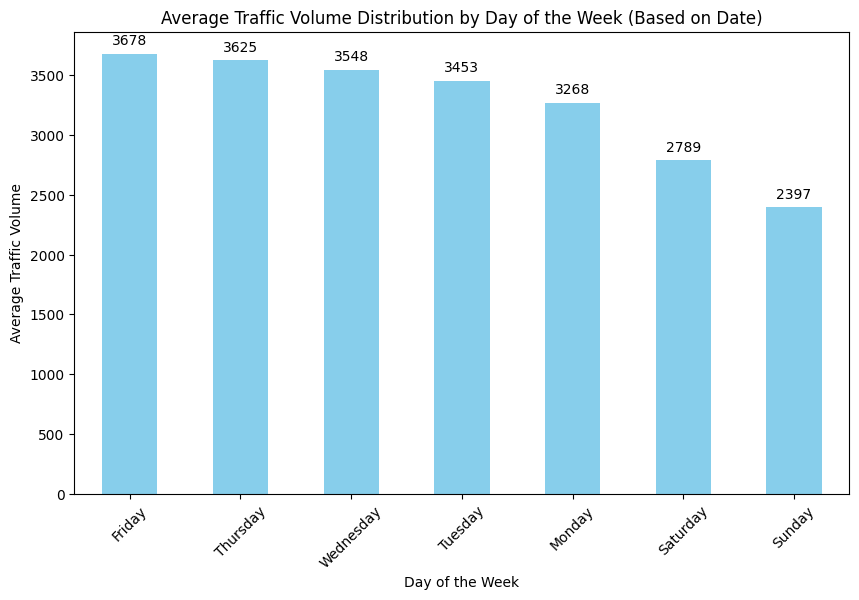

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week (0=Monday, 6=Sunday) from 'Date'
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Calculate average traffic volume for each day of the week
day_of_week_avg_traffic = df.groupby('Day_of_Week')['traffic_volume'].mean()

# Sort average traffic volume by day of the week in descending order
day_of_week_avg_traffic_sorted = day_of_week_avg_traffic.sort_values(ascending=False)

# Plot traffic volume distribution by day of the week (descending order of average traffic volume)
plt.figure(figsize=(10, 6))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_avg_traffic_sorted.index = [day_names[idx] for idx in day_of_week_avg_traffic_sorted.index]  # Set sorted day names as index
day_of_week_avg_traffic_sorted.plot(kind='bar', color='skyblue')

# Add average traffic volume as text labels on top of each bar
for i, avg_volume in enumerate(day_of_week_avg_traffic_sorted):
    plt.text(i, avg_volume + 50, f'{int(avg_volume)}', ha='center', va='bottom')

plt.title('Average Traffic Volume Distribution by Day of the Week (Based on Date)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()


C:\Users\kutta\AppData\Local\Temp\ipykernel_20424\4289865856.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


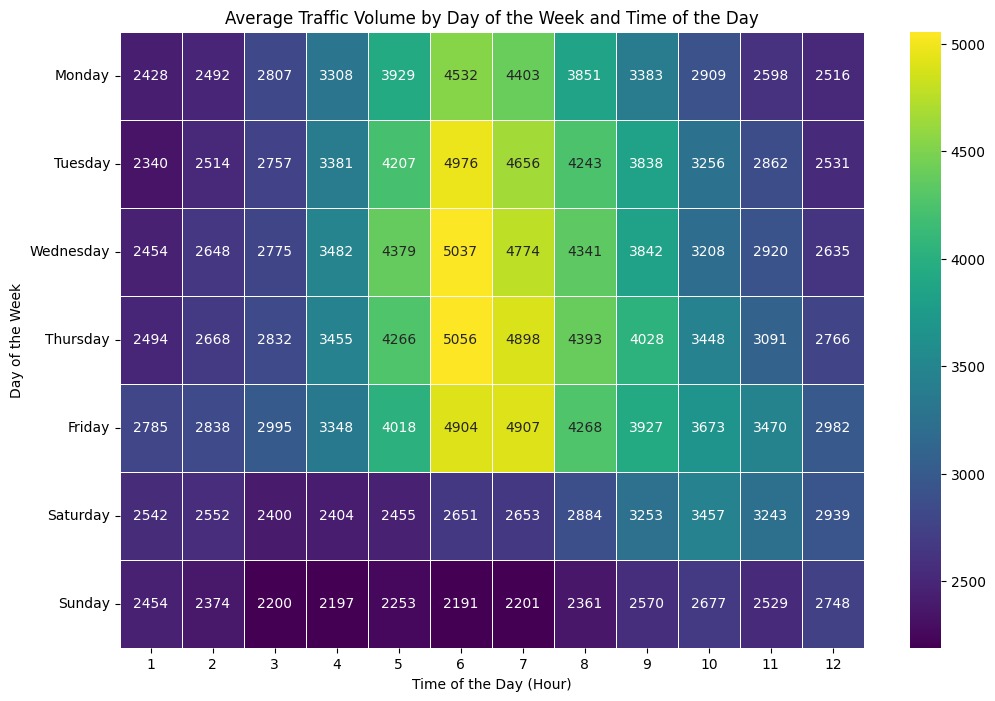

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week (0=Monday, 6=Sunday) and time of the day from datetime
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Time'] = pd.to_datetime(df['Time']).dt.hour

# Create a pivot table to calculate average traffic volume by day of the week and time of the day
traffic_pivot = df.pivot_table(index='Day_of_Week', columns='Time', values='traffic_volume', aggfunc='mean')

# Define day names for the pivot table rows
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
traffic_pivot.index = day_names

# Plot heatmap for average traffic volume by day of the week and time of the day
plt.figure(figsize=(12, 8))
sns.heatmap(traffic_pivot, cmap='viridis', annot=True, fmt='.0f', linewidths=0.5)

plt.title('Average Traffic Volume by Day of the Week and Time of the Day')
plt.xlabel('Time of the Day (Hour)')
plt.ylabel('Day of the Week')
plt.yticks(rotation=0)
plt.show()


C:\Users\kutta\AppData\Local\Temp\ipykernel_12492\261760826.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM/PM'])


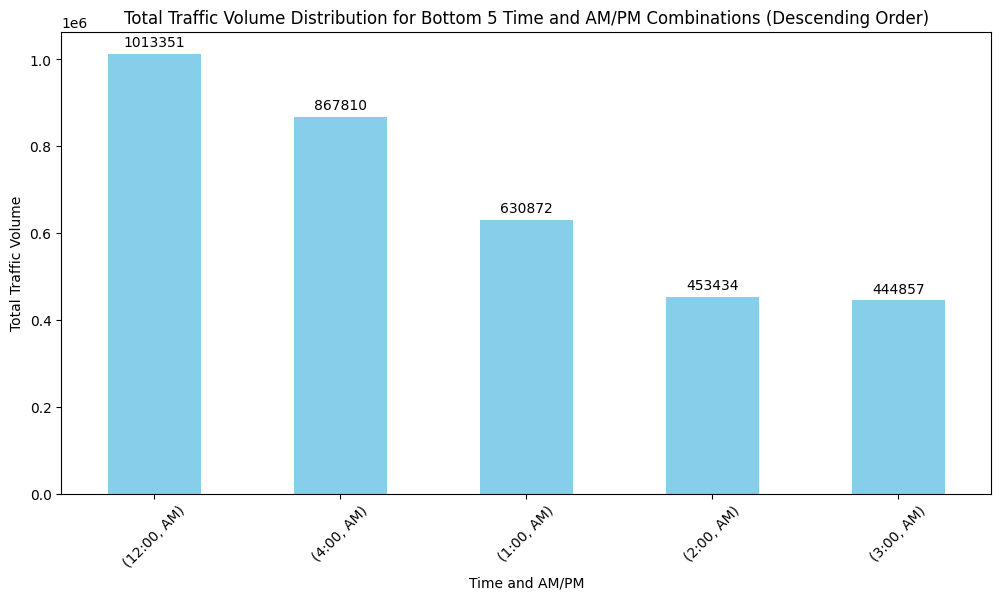

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Combine Time and AM/PM into a single datetime column
df['Datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM/PM'])

# Calculate total traffic volume for each Time and AM/PM combination
time_ampm_traffic = df.groupby(['Time', 'AM/PM'])['traffic_volume'].sum()

# Select the bottom 5 Time and AM/PM combinations with the lowest total traffic volume
bottom_time_ampm_traffic = time_ampm_traffic.nsmallest(5)  # Get bottom 5 combinations by traffic volume

# Sort the bottom combinations by traffic volume in descending order
bottom_time_ampm_traffic = bottom_time_ampm_traffic.sort_values(ascending=False)

# Plot traffic volume distribution for the bottom 5 Time and AM/PM combinations
plt.figure(figsize=(12, 6))
bottom_time_ampm_traffic.plot(kind='bar', color='skyblue')

# Add total traffic volume as text labels on top of each bar
for i, volume in enumerate(bottom_time_ampm_traffic):
    plt.text(i, volume + 10000, f'{int(volume)}', ha='center', va='bottom')

plt.title('Total Traffic Volume Distribution for Bottom 5 Time and AM/PM Combinations')
plt.xlabel('Time and AM/PM')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.show()


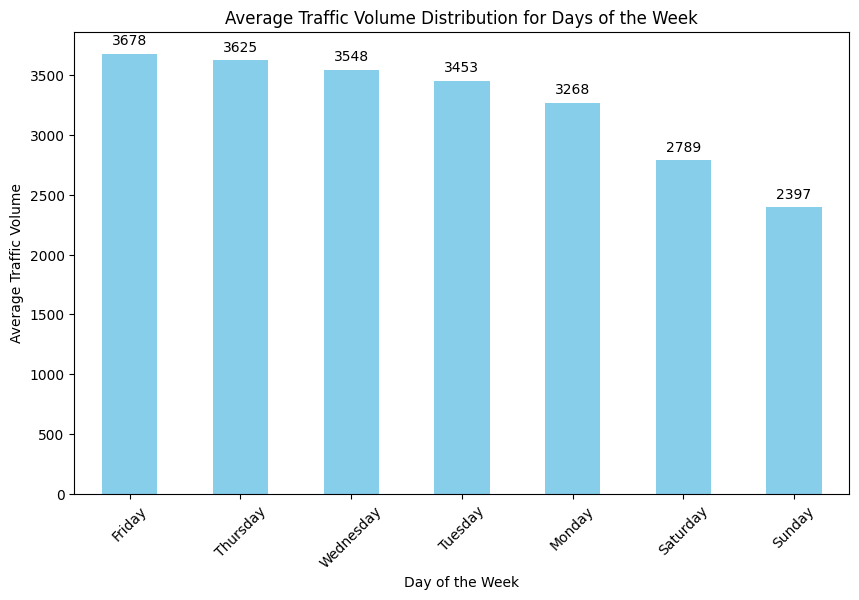

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format and extract the day of the week (0=Monday, 6=Sunday)
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Calculate average traffic volume for each day of the week
day_of_week_avg_traffic = df.groupby('Day_of_Week')['traffic_volume'].mean()

# Sort average traffic volume by day of the week in descending order
day_of_week_avg_traffic_sorted = day_of_week_avg_traffic.sort_values(ascending=False)  # Sort in descending order

# Plot traffic volume distribution for all days of the week in descending order
plt.figure(figsize=(10, 6))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_avg_traffic_sorted.index = [day_names[idx] for idx in day_of_week_avg_traffic_sorted.index]  # Set sorted day names as index
day_of_week_avg_traffic_sorted.plot(kind='bar', color='skyblue')

# Add average traffic volume as text labels on top of each bar
for i, avg_volume in enumerate(day_of_week_avg_traffic_sorted):
    plt.text(i, avg_volume + 50, f'{int(avg_volume)}', ha='center', va='bottom')

plt.title('Average Traffic Volume Distribution for Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()


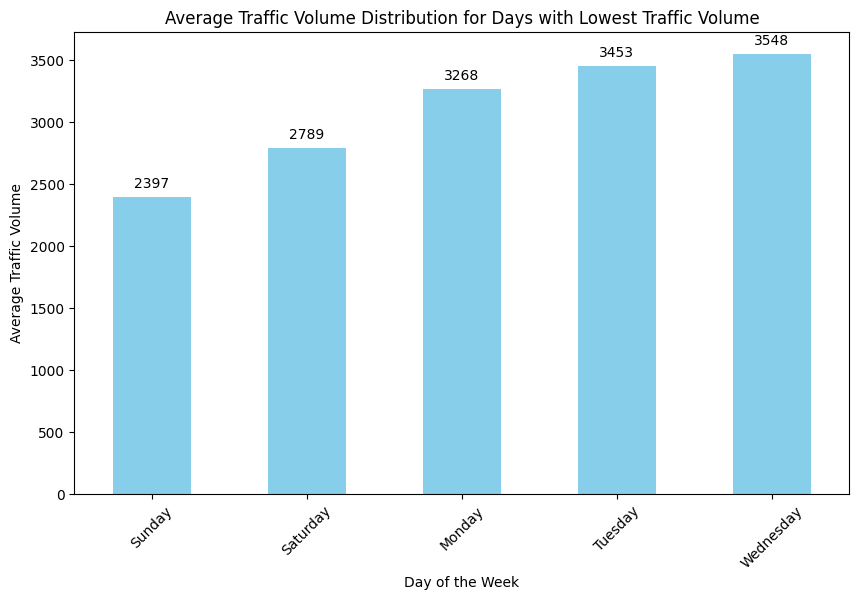

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format and extract the day of the week (0=Monday, 6=Sunday)
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Calculate average traffic volume for each day of the week
day_of_week_avg_traffic = df.groupby('Day_of_Week')['traffic_volume'].mean()

# Sort average traffic volume by day of the week in ascending order
day_of_week_avg_traffic_sorted = day_of_week_avg_traffic.sort_values()

# Select the days with the lowest average traffic volume (bottom 5)
bottom_day_of_week_avg_traffic = day_of_week_avg_traffic_sorted.head(5)

# Plot traffic volume distribution for the bottom days with the lowest average traffic volume
plt.figure(figsize=(10, 6))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bottom_day_of_week_avg_traffic.index = [day_names[idx] for idx in bottom_day_of_week_avg_traffic.index]  # Set sorted day names as index
bottom_day_of_week_avg_traffic.plot(kind='bar', color='skyblue')

# Add average traffic volume as text labels on top of each bar
for i, avg_volume in enumerate(bottom_day_of_week_avg_traffic):
    plt.text(i, avg_volume + 50, f'{int(avg_volume)}', ha='center', va='bottom')

plt.title('Average Traffic Volume Distribution for Days with Lowest Traffic Volume')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()


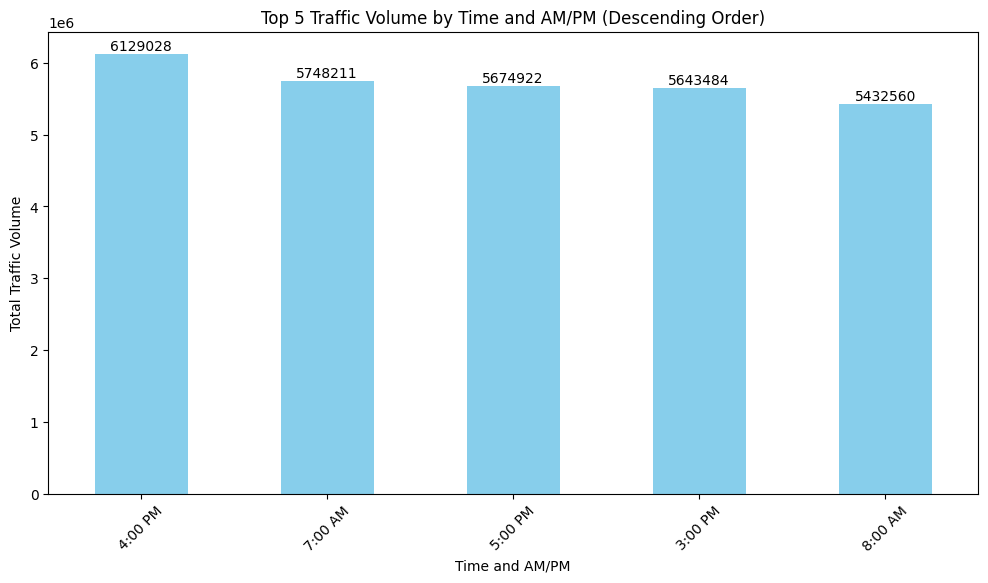

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Combine Time and AM/PM into a single column for time period
df['Time_Period'] = df['Time'] + ' ' + df['AM/PM']

# Calculate total traffic volume for each Time and AM/PM combination
time_ampm_traffic = df.groupby('Time_Period')['traffic_volume'].sum()

# Select the top 5 Time and AM/PM combinations with the highest total traffic volume
top_5_time_ampm_traffic = time_ampm_traffic.nlargest(5)

# Sort the top combinations by traffic volume in descending order
top_5_time_ampm_traffic = top_5_time_ampm_traffic.sort_values(ascending=False)

# Plot traffic volume distribution for the top 5 Time and AM/PM combinations
plt.figure(figsize=(12, 6))
top_5_time_ampm_traffic.plot(kind='bar', color='skyblue')

# Add total traffic volume as text labels on top of each bar
for i, volume in enumerate(top_5_time_ampm_traffic):
    plt.text(i, volume + 10000, f'{int(volume)}', ha='center', va='bottom')

plt.title('Top 5 Traffic Volume by Time and AM/PM (Descending Order)')
plt.xlabel('Time and AM/PM')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.show()


In [7]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert 'Time' column to datetime format to extract the hour
df['Time'] = pd.to_datetime(df['Time'])

# Extract hour of the day from the 'Time' column
df['Hour'] = df['Time'].dt.hour

# Define a function to determine AM/PM based on the hour
def get_ampm(hour):
    if hour < 12:
        return f"{hour} AM"
    else:
        return f"{hour - 12} PM"

# Create a new column combining 'Hour' and AM/PM for grouping
df['Hour_AMPM'] = df['Hour'].apply(get_ampm)

# Calculate total traffic volume for each unique combination of 'Hour_AMPM'
hour_ampm_traffic_sum = df.groupby('Hour_AMPM')['traffic_volume'].sum()

# Sort the total traffic volume in descending order
hour_ampm_traffic_sum_sorted = hour_ampm_traffic_sum.sort_values(ascending=False)

# Print the total traffic volume for each unique combination of 'Hour_AMPM' in descending order
print("\nTotal Traffic Volume by Hour and AM/PM (Descending Order):")
print(hour_ampm_traffic_sum_sorted)



Total Traffic Volume by Hour and AM/PM (Descending Order):
Hour_AMPM
6 AM     9761742
7 AM     9383140
8 AM     8568414
5 AM     8266758
9 AM     8132192
10 AM    7507009
4 AM     6996838
11 AM    6804084
0 PM     6293212
3 AM     6088341
2 AM     5815583
1 AM     5692867
Name: traffic_volume, dtype: int64


C:\Users\kutta\AppData\Local\Temp\ipykernel_12492\1288237825.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


C:\Users\kutta\AppData\Local\Temp\ipykernel_12492\1858534182.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


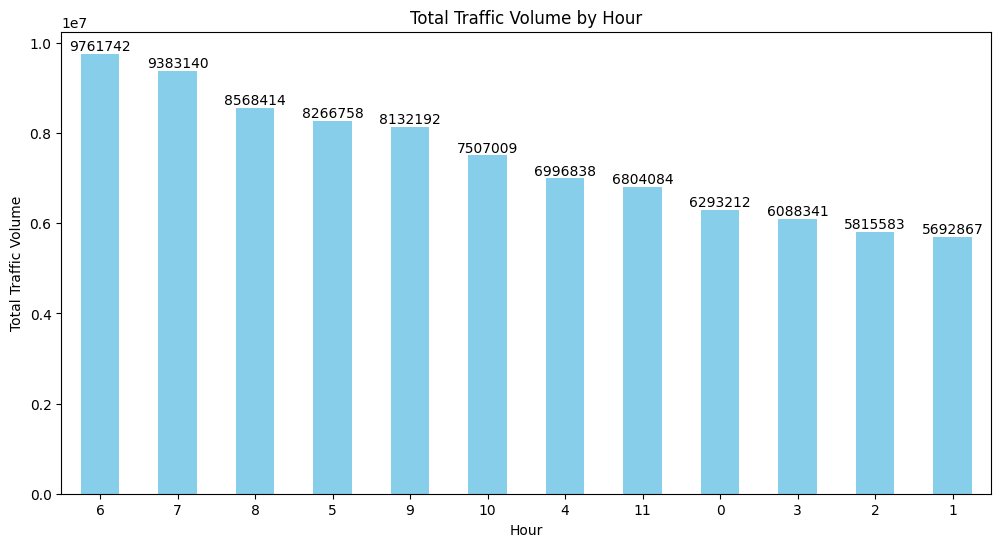

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert 'Time' column to datetime format to extract the hour
df['Time'] = pd.to_datetime(df['Time'])

# Extract hour of the day from the 'Time' column and convert to 12-hour format
df['Hour_12'] = df['Time'].dt.hour % 12  # Get hour in 12-hour format (0-11)

# Calculate total traffic volume for each unique hour (in 12-hour format)
hour_traffic_sum = df.groupby('Hour_12')['traffic_volume'].sum()

# Sort the total traffic volume in descending order
hour_traffic_sum_sorted = hour_traffic_sum.sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
hour_traffic_sum_sorted.plot(kind='bar', color='skyblue')

# Add total traffic volume as text labels on top of each bar
for i, volume in enumerate(hour_traffic_sum_sorted):
    plt.text(i, volume + 10000, f'{int(volume)}', ha='center', va='bottom')

plt.title('Total Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=0)  # Keep hour labels horizontal
plt.show()


C:\Users\kutta\AppData\Local\Temp\ipykernel_22868\6417832.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


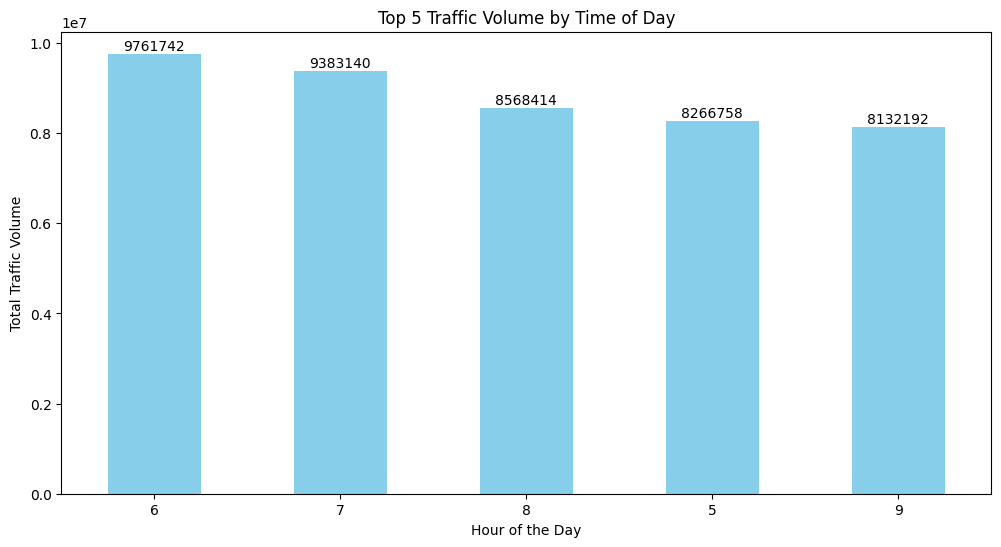

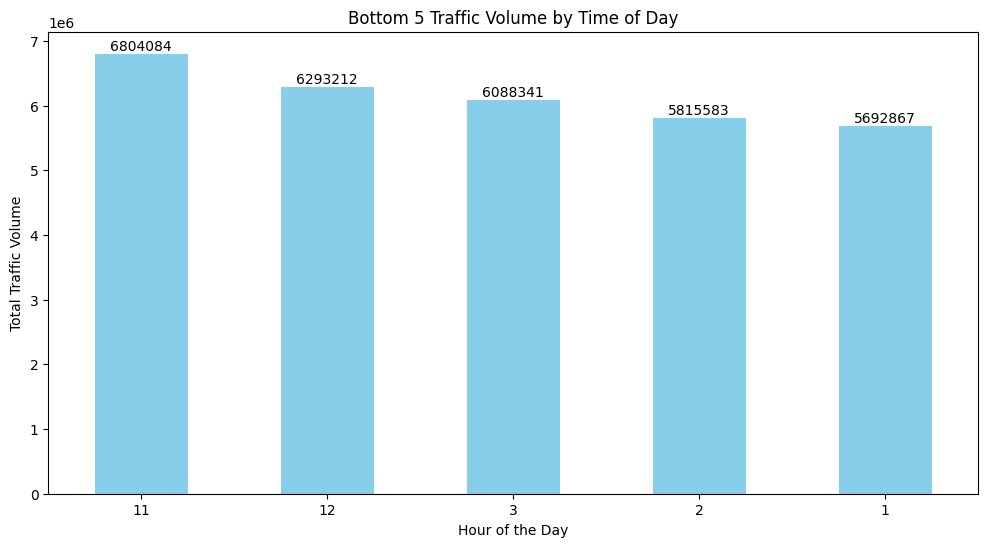

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Time column to datetime format to extract the hour of the day
df['Time'] = pd.to_datetime(df['Time']).dt.hour

# Calculate total traffic volume for each hour of the day
hourly_traffic_volume = df.groupby('Time')['traffic_volume'].sum()

# Sort the hourly traffic volume in descending order to find the top and bottom hours
hourly_traffic_volume_sorted = hourly_traffic_volume.sort_values(ascending=False)

# Plot the top 5 traffic volume counts by time of day
plt.figure(figsize=(12, 6))
top_5_hours = hourly_traffic_volume_sorted.head(5)
top_5_hours.plot(kind='bar', color='skyblue')

# Add total traffic volume as text labels on top of each bar
for i, volume in enumerate(top_5_hours):
    plt.text(i, volume + 10000, f'{int(volume)}', ha='center', va='bottom')

plt.title('Top 5 Traffic Volume by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=0)
plt.show()

# Plot the bottom 5 traffic volume counts by time of day
plt.figure(figsize=(12, 6))
bottom_5_hours = hourly_traffic_volume_sorted.tail(5)
bottom_5_hours.plot(kind='bar', color='skyblue')

# Add total traffic volume as text labels on top of each bar
for i, volume in enumerate(bottom_5_hours):
    plt.text(i, volume + 10000, f'{int(volume)}', ha='center', va='bottom')

plt.title('Bottom 5 Traffic Volume by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=0)
plt.show()


C:\Users\kutta\AppData\Local\Temp\ipykernel_22868\3946286110.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


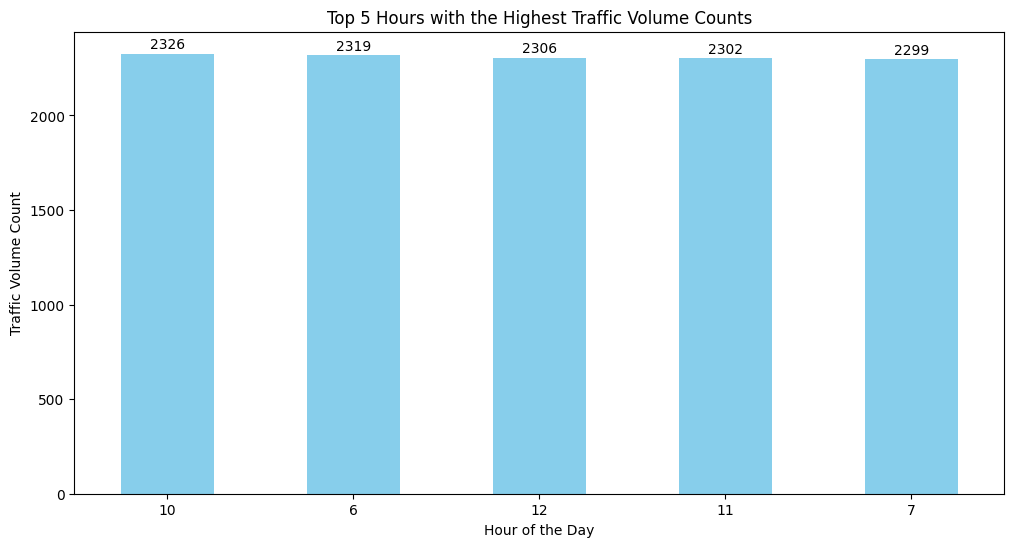

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Time column to datetime format to extract the hour of the day
df['Time'] = pd.to_datetime(df['Time']).dt.hour

# Count the occurrences of each hour of the day (Time)
hourly_traffic_counts = df['Time'].value_counts()

# Sort the hourly traffic counts in descending order to find the top and bottom hours
hourly_traffic_counts_sorted = hourly_traffic_counts.sort_values(ascending=False)

# Plot the top 5 hours with the highest traffic volume counts
plt.figure(figsize=(12, 6))
top_5_hours = hourly_traffic_counts_sorted.head(5)
top_5_hours.plot(kind='bar', color='skyblue')

# Add traffic volume counts as text labels on top of each bar
for i, count in enumerate(top_5_hours):
    plt.text(i, count + 10, f'{count}', ha='center', va='bottom')

plt.title('Top 5 Hours with the Highest Traffic Volume Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume Count')
plt.xticks(rotation=0)
plt.show()



C:\Users\kutta\AppData\Local\Temp\ipykernel_22868\1155323503.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


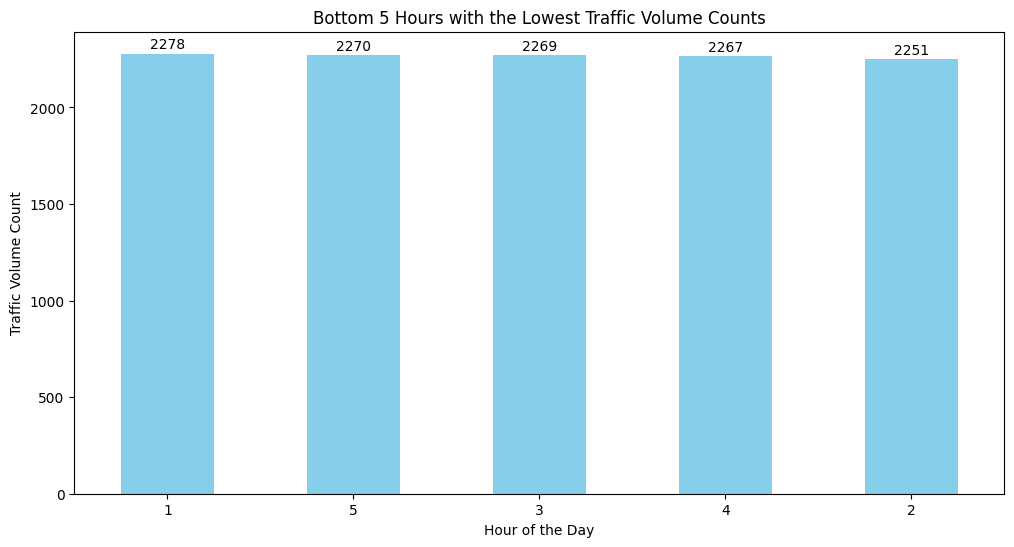

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\kutta\OneDrive\Desktop\Predictive Analytics\Predictive Analysis Project\grouped_records.csv"
df = pd.read_csv(file_path)

# Convert Time column to datetime format to extract the hour of the day
df['Time'] = pd.to_datetime(df['Time']).dt.hour

# Count the occurrences of each hour of the day (Time)
hourly_traffic_counts = df['Time'].value_counts()

# Sort the hourly traffic counts in ascending order to find the bottom 5 hours
hourly_traffic_counts_sorted = hourly_traffic_counts.sort_values(ascending=True)

# Select the bottom 5 hours with the lowest traffic volume counts
bottom_5_hours = hourly_traffic_counts_sorted.head(5)

# Reverse the order of bottom_5_hours to plot in descending order
bottom_5_hours_sorted = bottom_5_hours.sort_values(ascending=False)

# Plot the bottom 5 hours with the lowest traffic volume counts (descending order)
plt.figure(figsize=(12, 6))
bottom_5_hours_sorted.plot(kind='bar', color='skyblue')

# Add traffic volume counts as text labels on top of each bar
for i, count in enumerate(bottom_5_hours_sorted):
    plt.text(i, count + 10, f'{count}', ha='center', va='bottom')

plt.title('Bottom 5 Hours with the Lowest Traffic Volume Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume Count')
plt.xticks(rotation=0)
plt.show()
